In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%cd /content/drive/My Drive/Colab Notebooks/udemy projeler/3- polynomialLinearRegression

/content/drive/My Drive/Colab Notebooks/udemy projeler/3- polynomialLinearRegression


In [6]:
ls

polynomial.csv                    PolynomialLinearRegression.ipynb
polynomialLinearRegression.ipynb


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


# Veri setimizi pandas yardımıyla alıp dataframe nesnemiz olan df'in içine aktarıyoruz..
df = pd.read_csv("polynomial.csv",sep = ";")


In [8]:
df

,deneyim,maas
0,1,4500
1,2,5000
2,3,6000
3,4,8000
4,5,11000
5,6,15000
6,7,20000
7,8,30000
8,9,50000
9,10,100000


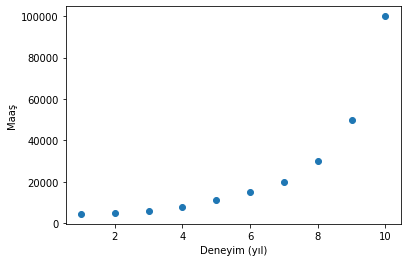

In [9]:

# Veri setimize bir bakalım
plt.scatter(df['deneyim'],df['maas'])
plt.xlabel('Deneyim (yıl)')
plt.ylabel('Maaş')
plt.savefig('1.png', dpi=300)
plt.show()

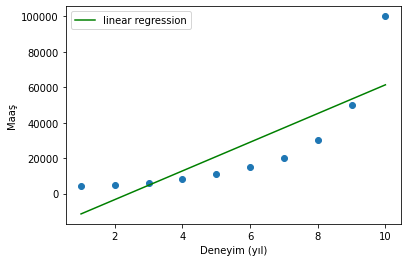

In [10]:
# Görüldüğü gibi doğrusal bir yapıda dağılmıyor veriler
# Eğer biz bu veri setine linear regression uygularsak hiç uygun olmayan bir tahmin çizigisi görürüz:

reg = LinearRegression()
reg.fit(df[['deneyim']],df['maas'])

plt.xlabel('Deneyim (yıl)')
plt.ylabel('Maaş')

plt.scatter(df['deneyim'],df['maas'])   

xekseni = df['deneyim']
yekseni = reg.predict(df[['deneyim']])
plt.plot(xekseni, yekseni,color= "green", label = "linear regression")
plt.legend()
plt.show()

In [11]:
# bir adet polynomial regression nesnesi oluşturması için PolynomialFeatures fonksiyonunu çağırıyoruz
# Bu fonksiyonu çağırırken polinomun derecesini (N) belirtiyoruz:
polynomial_regression = PolynomialFeatures(degree = 4)

x_polynomial = polynomial_regression.fit_transform(df[['deneyim']])


In [12]:
# regression model nesnemizi olan reg nesnemizi oluşturup bunun fit metonu çağırarak x_polynomial ve y eksenlerini fit ediyor
# yani regresyon modelimizi mevcut gerçek verilerle eğitiyoruz:
reg = LinearRegression()
reg.fit(x_polynomial,df['maas'])


LinearRegression()

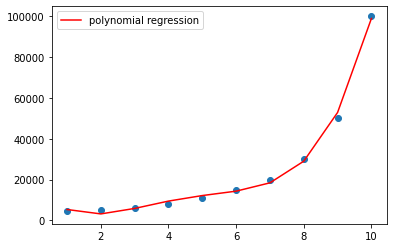

In [13]:
y_head = reg.predict(x_polynomial)
plt.plot(df['deneyim'],y_head,color= "red",label = "polynomial regression")
#plt.plot(xekseni, yekseni,color= "green", label = "linear regression")
plt.legend()

#veri setimizi de noktlaı olarak scatter edelim de görelim bakalım uymuş mu polynomial regression:
plt.scatter(df['deneyim'],df['maas'])   

plt.show()

In [14]:

x_polynomial1 = polynomial_regression.fit_transform([[4.5]])
reg.predict(x_polynomial1)

array([10958.21496211])